In [220]:
#Dependencies
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt
# Google API Key
#from config import gkey

In [221]:
# Load JSON Crime data for 2015
filepath = os.path.join("C:\\Users\\kvman\\Documents\\UCF_Course\\GIT\\git\\Trilogy\\Project-1", "Data", "crime_2015.json")
open_crime_2015=pd.read_json(filepath)
open_crime_2015.head()
crimes_data_columns=["id","case_number","date","district","community_area", "iucr","year","primary_type"]
open_crime_2015_filtered=open_crime_2015[crimes_data_columns]
open_crime_2015_filtered.head()

,id,case_number,date,district,community_area,iucr,year,primary_type
0,10460641,HZ199559,2015-12-31 23:59:00,14,23,0890,2015,THEFT
1,10365064,HZ100370,2015-12-31 23:59:00,6,68,1320,2015,CRIMINAL DAMAGE
2,10364662,HZ100006,2015-12-31 23:55:00,4,45,0430,2015,BATTERY
3,10364683,HZ100002,2015-12-31 23:50:00,19,6,0460,2015,BATTERY
4,10364740,HZ100010,2015-12-31 23:50:00,24,2,0820,2015,THEFT


In [223]:
#Data count validation: 
open_crime_2015_filtered.count()


id                264306
case_number       264306
date              264306
district          264306
community_area    264306
iucr              264306
year              264306
primary_type      264306
dtype: int64

In [224]:
# Load JSON Crime data for 2016
filepath = os.path.join("C:\\Users\\kvman\\Documents\\UCF_Course\\GIT\\git\\Trilogy\\Project-1", "Data", "crime_2016.json")
open_crime_2016=pd.read_json(filepath)
open_crime_2016.head()
open_crime_2016_filtered=open_crime_2016[crimes_data_columns]
open_crime_2016_filtered.head()

,id,case_number,date,district,community_area,iucr,year,primary_type
0,10819224,JA119772,2016-12-31 23:59:00,16,76,0810,2016,THEFT
1,10801137,JA100016,2016-12-31 23:58:00,5,49,0430,2016,BATTERY
2,10801110,JA100027,2016-12-31 23:55:00,19,6,2250,2016,LIQUOR LAW VIOLATION
3,10802006,JA100012,2016-12-31 23:55:00,1,32,0486,2016,BATTERY
4,10801865,JA100839,2016-12-31 23:54:00,6,69,1310,2016,CRIMINAL DAMAGE


In [225]:
# Load JSON Crime data for 2017
filepath = os.path.join("C:\\Users\\kvman\\Documents\\UCF_Course\\GIT\\git\\Trilogy\\Project-1", "Data", "crime_2017.json")
open_crime_2017=pd.read_json(filepath)
open_crime_2017.head()
open_crime_2017_filtered=open_crime_2017[crimes_data_columns]
open_crime_2017_filtered.head()

,id,case_number,date,district,community_area,iucr,year,primary_type
0,11192233,JB100016,2017-12-31 23:58:00,17.0,14,0630,2017,BURGLARY
1,11196379,JB105867,2017-12-31 23:50:00,19.0,7,0460,2017,BATTERY
2,11192540,JB100551,2017-12-31 23:48:00,18.0,8,0890,2017,THEFT
3,11192239,JB100032,2017-12-31 23:45:00,12.0,31,1320,2017,CRIMINAL DAMAGE
4,11192254,JB100003,2017-12-31 23:45:00,5.0,53,041A,2017,BATTERY


In [226]:
# Appending all data frames for 2015-2017 as a single df
all_crime_data=pd.concat([open_crime_2015_filtered,open_crime_2016_filtered,open_crime_2017_filtered], axis=0)
all_crime_data.count()
all_crime_data.head()
#all_crime_data.describe()


,id,case_number,date,district,community_area,iucr,year,primary_type
0,10460641,HZ199559,2015-12-31 23:59:00,14.0,23,0890,2015,THEFT
1,10365064,HZ100370,2015-12-31 23:59:00,6.0,68,1320,2015,CRIMINAL DAMAGE
2,10364662,HZ100006,2015-12-31 23:55:00,4.0,45,0430,2015,BATTERY
3,10364683,HZ100002,2015-12-31 23:50:00,19.0,6,0460,2015,BATTERY
4,10364740,HZ100010,2015-12-31 23:50:00,24.0,2,0820,2015,THEFT


In [227]:
#Rounding the date in crime data
all_crime_data.date
all_crime_data1 = pd.to_datetime(all_crime_data.date).dt.round("60min")
all_crime_data1.head(100)

0    2016-01-01 00:00:00
1    2016-01-01 00:00:00
2    2016-01-01 00:00:00
3    2016-01-01 00:00:00
4    2016-01-01 00:00:00
             ...        
95   2015-12-31 21:00:00
96   2015-12-31 21:00:00
97   2015-12-31 21:00:00
98   2015-12-31 21:00:00
99   2015-12-31 21:00:00
Name: date, Length: 100, dtype: datetime64[ns]

In [228]:
# Load weather data for 2015-2017
filepath = os.path.join("C:\\Users\\kvman\\Documents\\UCF_Course\\GIT\\git\\Trilogy\\Project-1", "Data", "weather.json")
open_weather=pd.read_json(filepath)
open_weather.head()

,city_name,lat,lon,main,wind,snow,clouds,weather,dt,dt_iso,timezone,rain
0,Chicago,41.875562,-87.624421,"{'temp': 18.14, 'temp_min': 17.06, 'temp_max':...","{'speed': 13.87, 'deg': 230}",{'1h': 0},{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1420070400,2015-01-01 00:00:00 +0000 UTC,-21600,NaN
1,Chicago,41.875562,-87.624421,"{'temp': 18.59, 'temp_min': 17.96, 'temp_max':...","{'speed': 19.69, 'deg': 230}",{'1h': 0},{'all': 20},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420074000,2015-01-01 01:00:00 +0000 UTC,-21600,NaN
2,Chicago,41.875562,-87.624421,"{'temp': 18.59, 'temp_min': 17.96, 'temp_max':...","{'speed': 16.11, 'deg': 230}",{'1h': 0},{'all': 20},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420077600,2015-01-01 02:00:00 +0000 UTC,-21600,NaN
3,Chicago,41.875562,-87.624421,"{'temp': 18.93, 'temp_min': 17.96, 'temp_max':...","{'speed': 17.22, 'deg': 240}",NaN,{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1420081200,2015-01-01 03:00:00 +0000 UTC,-21600,NaN
4,Chicago,41.875562,-87.624421,"{'temp': 19.13, 'temp_min': 17.96, 'temp_max':...","{'speed': 20.8, 'deg': 240}",{'1h': 0},{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1420084800,2015-01-01 04:00:00 +0000 UTC,-21600,NaN


In [229]:
#Flattening the columns for temp, wind and cloud
weather_data_dic_col=["main","wind","clouds"]
for i in weather_data_dic_col:
        normalized_col=pd.io.json.json_normalize(open_weather[i])
        open_weather=open_weather.drop([i], axis=1)
        open_weather=pd.concat([open_weather,normalized_col], axis=1)

In [230]:
#Reading the column names
open_weather.columns

Index(['city_name', 'lat', 'lon', 'snow', 'weather', 'dt', 'dt_iso',
       'timezone', 'rain', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'speed', 'deg', 'all'],
      dtype='object')

In [231]:
open_weather.head()

,city_name,lat,lon,snow,weather,dt,dt_iso,timezone,rain,temp,temp_min,temp_max,pressure,humidity,speed,deg,all
0,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420070400,2015-01-01 00:00:00 +0000 UTC,-21600,NaN,18.14,17.06,19.40,1023.4,46,13.87,230,1
1,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420074000,2015-01-01 01:00:00 +0000 UTC,-21600,NaN,18.59,17.96,19.40,1023.0,46,19.69,230,20
2,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420077600,2015-01-01 02:00:00 +0000 UTC,-21600,NaN,18.59,17.96,19.40,1023.0,48,16.11,230,20
3,Chicago,41.875562,-87.624421,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",1420081200,2015-01-01 03:00:00 +0000 UTC,-21600,NaN,18.93,17.96,19.94,1024.7,46,17.22,240,1
4,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420084800,2015-01-01 04:00:00 +0000 UTC,-21600,NaN,19.13,17.96,20.66,1022.4,44,20.80,240,1


In [232]:
#Checking the data types for weather data after flattening
open_weather.dtypes

city_name     object
lat          float64
lon          float64
snow          object
weather       object
dt             int64
dt_iso        object
timezone       int64
rain          object
temp         float64
temp_min     float64
temp_max     float64
pressure     float64
humidity       int64
speed        float64
deg            int64
all            int64
dtype: object

In [233]:
#stripping the UTC string
open_weather['dt_iso'] = open_weather['dt_iso'].map(lambda x: x.lstrip('+-').rstrip('UTC'))
#open_weather.head()
#Errored open_weather['dt_iso'] = pd.to_datetime(open_weather['dt_iso']).tz_localize("UTC").tz_convert('US/Central')
open_weather['dt_iso'] = pd.to_datetime(open_weather.dt_iso).dt.tz_convert('US/Central').dt.tz_localize(None)
open_weather.head()


,city_name,lat,lon,snow,weather,dt,dt_iso,timezone,rain,temp,temp_min,temp_max,pressure,humidity,speed,deg,all
0,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420070400,2014-12-31 18:00:00,-21600,NaN,18.14,17.06,19.40,1023.4,46,13.87,230,1
1,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420074000,2014-12-31 19:00:00,-21600,NaN,18.59,17.96,19.40,1023.0,46,19.69,230,20
2,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420077600,2014-12-31 20:00:00,-21600,NaN,18.59,17.96,19.40,1023.0,48,16.11,230,20
3,Chicago,41.875562,-87.624421,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",1420081200,2014-12-31 21:00:00,-21600,NaN,18.93,17.96,19.94,1024.7,46,17.22,240,1
4,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420084800,2014-12-31 22:00:00,-21600,NaN,19.13,17.96,20.66,1022.4,44,20.80,240,1


In [234]:
#Renaming the column for data merge
open_weather.rename(columns = {'dt_iso':'date'}, inplace = True)
open_weather.head()

,city_name,lat,lon,snow,weather,dt,date,timezone,rain,temp,temp_min,temp_max,pressure,humidity,speed,deg,all
0,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420070400,2014-12-31 18:00:00,-21600,NaN,18.14,17.06,19.40,1023.4,46,13.87,230,1
1,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420074000,2014-12-31 19:00:00,-21600,NaN,18.59,17.96,19.40,1023.0,46,19.69,230,20
2,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420077600,2014-12-31 20:00:00,-21600,NaN,18.59,17.96,19.40,1023.0,48,16.11,230,20
3,Chicago,41.875562,-87.624421,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",1420081200,2014-12-31 21:00:00,-21600,NaN,18.93,17.96,19.94,1024.7,46,17.22,240,1
4,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420084800,2014-12-31 22:00:00,-21600,NaN,19.13,17.96,20.66,1022.4,44,20.80,240,1


In [235]:
#Merging the Weather data with crime data - Left outer join
merge_table = pd.merge(open_weather, all_crime_data, on="date", how="left")
merge_table.head(200)

,city_name,lat,lon,snow,weather,dt,date,timezone,rain,temp,...,speed,deg,all,id,case_number,district,community_area,iucr,year,primary_type
0,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420070400,2014-12-31 18:00:00,-21600,NaN,18.14,...,13.87,230,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420074000,2014-12-31 19:00:00,-21600,NaN,18.59,...,19.69,230,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420077600,2014-12-31 20:00:00,-21600,NaN,18.59,...,16.11,230,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chicago,41.875562,-87.624421,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",1420081200,2014-12-31 21:00:00,-21600,NaN,18.93,...,17.22,240,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420084800,2014-12-31 22:00:00,-21600,NaN,19.13,...,20.80,240,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Chicago,41.875562,-87.624421,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",1420102800,2015-01-01 03:00:00,-21600,NaN,17.22,...,18.34,250,1,9911510.0,HY100593,8.0,63.0,0910,2015.0,MOTOR VEHICLE THEFT
196,Chicago,41.875562,-87.624421,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",1420102800,2015-01-01 03:00:00,-21600,NaN,17.22,...,18.34,250,1,9925742.0,HY114425,17.0,16.0,2820,2015.0,OTHER OFFENSE
197,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420106400,2015-01-01 04:00:00,-21600,NaN,16.84,...,16.11,250,1,9913502.0,HY102588,11.0,26.0,0810,2015.0,THEFT
198,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420106400,2015-01-01 04:00:00,-21600,NaN,16.84,...,16.11,250,1,9960530.0,HY148779,18.0,8.0,0860,2015.0,THEFT


In [236]:
#checkig the column values, dtype
open_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 17 columns):
city_name    26307 non-null object
lat          26307 non-null float64
lon          26307 non-null float64
snow         4237 non-null object
weather      26307 non-null object
dt           26307 non-null int64
date         26307 non-null datetime64[ns]
timezone     26307 non-null int64
rain         18535 non-null object
temp         26307 non-null float64
temp_min     26307 non-null float64
temp_max     26307 non-null float64
pressure     26307 non-null float64
humidity     26307 non-null int64
speed        26307 non-null float64
deg          26307 non-null int64
all          26307 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(5), object(4)
memory usage: 3.4+ MB


In [237]:
# Checking the column vales and dtypemerge_table.info()

In [238]:
#Checking for null column values
merge_table.isnull().sum(axis = 0)

city_name              0
lat                    0
lon                    0
snow              240449
weather                0
dt                     0
date                   0
timezone               0
rain               75942
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
speed                  0
deg                    0
all                    0
id                   167
case_number          167
district             167
community_area       167
iucr                 167
year                 167
primary_type         167
dtype: int64

In [239]:
#Creating a new column that contains Year+month
merge_table["year_month"]=pd.to_datetime(merge_table.date).dt.to_period("M")
merge_table.head(200)

,city_name,lat,lon,snow,weather,dt,date,timezone,rain,temp,...,deg,all,id,case_number,district,community_area,iucr,year,primary_type,year_month
0,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420070400,2014-12-31 18:00:00,-21600,NaN,18.14,...,230,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12
1,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420074000,2014-12-31 19:00:00,-21600,NaN,18.59,...,230,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12
2,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 801, 'main': 'Clouds', 'description': ...",1420077600,2014-12-31 20:00:00,-21600,NaN,18.59,...,230,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12
3,Chicago,41.875562,-87.624421,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",1420081200,2014-12-31 21:00:00,-21600,NaN,18.93,...,240,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12
4,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420084800,2014-12-31 22:00:00,-21600,NaN,19.13,...,240,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Chicago,41.875562,-87.624421,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",1420102800,2015-01-01 03:00:00,-21600,NaN,17.22,...,250,1,9911510.0,HY100593,8.0,63.0,0910,2015.0,MOTOR VEHICLE THEFT,2015-01
196,Chicago,41.875562,-87.624421,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",1420102800,2015-01-01 03:00:00,-21600,NaN,17.22,...,250,1,9925742.0,HY114425,17.0,16.0,2820,2015.0,OTHER OFFENSE,2015-01
197,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420106400,2015-01-01 04:00:00,-21600,NaN,16.84,...,250,1,9913502.0,HY102588,11.0,26.0,0810,2015.0,THEFT,2015-01
198,Chicago,41.875562,-87.624421,{'1h': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1420106400,2015-01-01 04:00:00,-21600,NaN,16.84,...,250,1,9960530.0,HY148779,18.0,8.0,0860,2015.0,THEFT,2015-01


In [240]:
#Chart plotting starts
#Bar chart
group_year_month=merge_table.groupby("year_month",as_index=False).agg(len)
#y=group_year_month["id"]
group_year_month.head()

,year_month,city_name,lat,lon,snow,weather,dt,date,timezone,rain,...,speed,deg,all,id,case_number,district,community_area,iucr,year,primary_type
0,2014-12,6,6.0,6.0,6,6,6,6,6,6,...,6.0,6,6,6.0,6,6.0,6.0,6,6.0,6
1,2015-01,7065,7065.0,7065.0,7065,7065,7065,7065,7065,7065,...,7065.0,7065,7065,7065.0,7065,7065.0,7065.0,7065,7065.0,7065
2,2015-02,5602,5602.0,5602.0,5602,5602,5602,5602,5602,5602,...,5602.0,5602,5602,5602.0,5602,5602.0,5602.0,5602,5602.0,5602
3,2015-03,7258,7258.0,7258.0,7258,7258,7258,7258,7258,7258,...,7258.0,7258,7258,7258.0,7258,7258.0,7258.0,7258,7258.0,7258
4,2015-04,7386,7386.0,7386.0,7386,7386,7386,7386,7386,7386,...,7386.0,7386,7386,7386.0,7386,7386.0,7386.0,7386,7386.0,7386


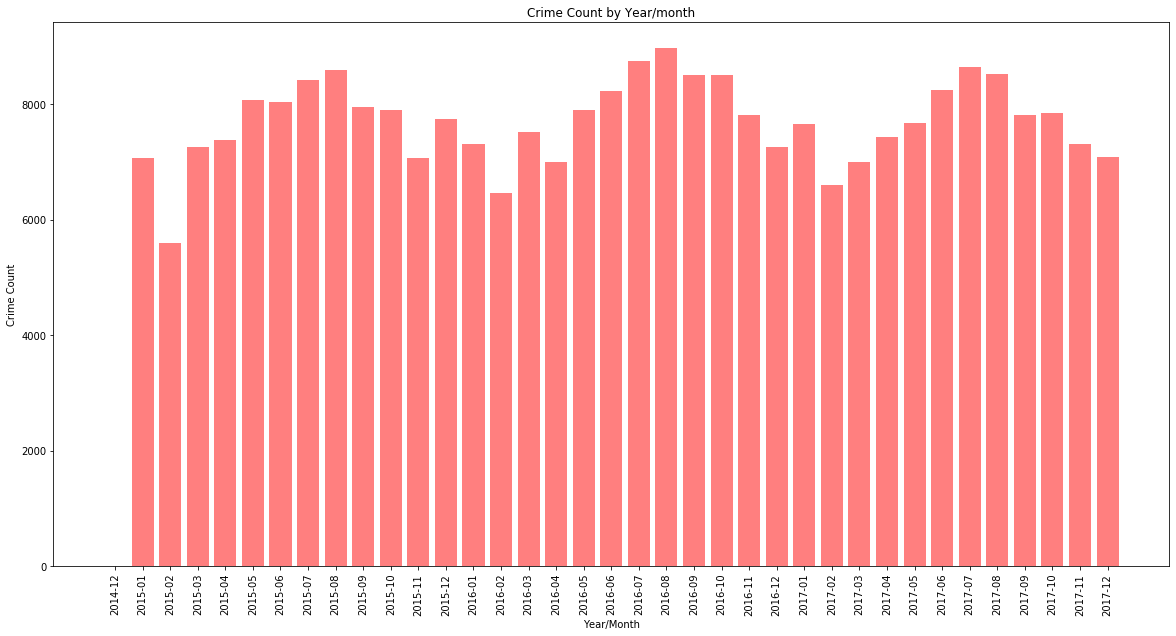

In [241]:
# Plotting count by Year-Month 
x_axis=group_year_month["year_month"].dt.strftime("%Y-%m")
y_axis=group_year_month["id"]
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.title("Crime Count by Year/month")
plt.xlabel("Year/Month")
plt.ylabel("Crime Count")
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(rotation=90)
plt.show()
#x_axis.value_counts()

In [242]:
#Checking for null values
group_year_month.isnull().sum(axis = 0)


year_month        0
city_name         0
lat               0
lon               0
snow              0
weather           0
dt                0
date              0
timezone          0
rain              0
temp              0
temp_min          0
temp_max          0
pressure          0
humidity          0
speed             0
deg               0
all               0
id                0
case_number       0
district          0
community_area    0
iucr              0
year              0
primary_type      0
dtype: int64

In [243]:
#Filtering for a set of crime types
filter_types=merge_table.primary_type.isin(["THEFT","CRIMINAL DAMAGE","BATTERY","DECEPTIVE PRACTICE","BURGLARY"])
filtered_data=merge_table[filter_types]
#filtered_data_year_month_type=merge_table.groupby(["year_month","primary_type"]).agg(len)
#group_year_month_type.sort_values("id",ascending=False)
#group_year_month_type.primary_type.value_counts()

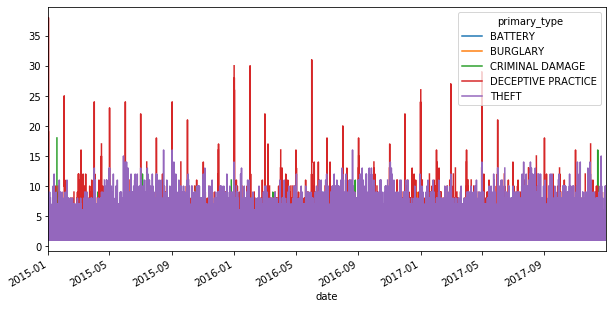

In [244]:
#extra
fig, ax = plt.subplots(figsize=(10,5))
filtered_data.groupby(['date','primary_type']).count()['id'].unstack().plot(ax=ax)
plt.show()


In [245]:
filtered_data_year_month_type1=filtered_data.groupby(["year_month","primary_type"]).agg(len)
#group_year_month_type.sort_values("id",ascending=False)
#group_year_month_type.primary_type.value_counts()
filtered_data_year_month_type1.id.value_counts()
#filtered_data.head(100)

846.0     3
1024.0    2
844.0     2
812.0     2
868.0     2
         ..
2703.0    1
773.0     1
2158.0    1
2177.0    1
792.0     1
Name: id, Length: 168, dtype: int64

In [246]:
temp_month=filtered_data[["year_month","temp"]].groupby(["year_month"]).mean().round()
temp_month.head()

,temp
year_month,
2015-01,26.0
2015-02,19.0
2015-03,38.0
2015-04,52.0
2015-05,63.0


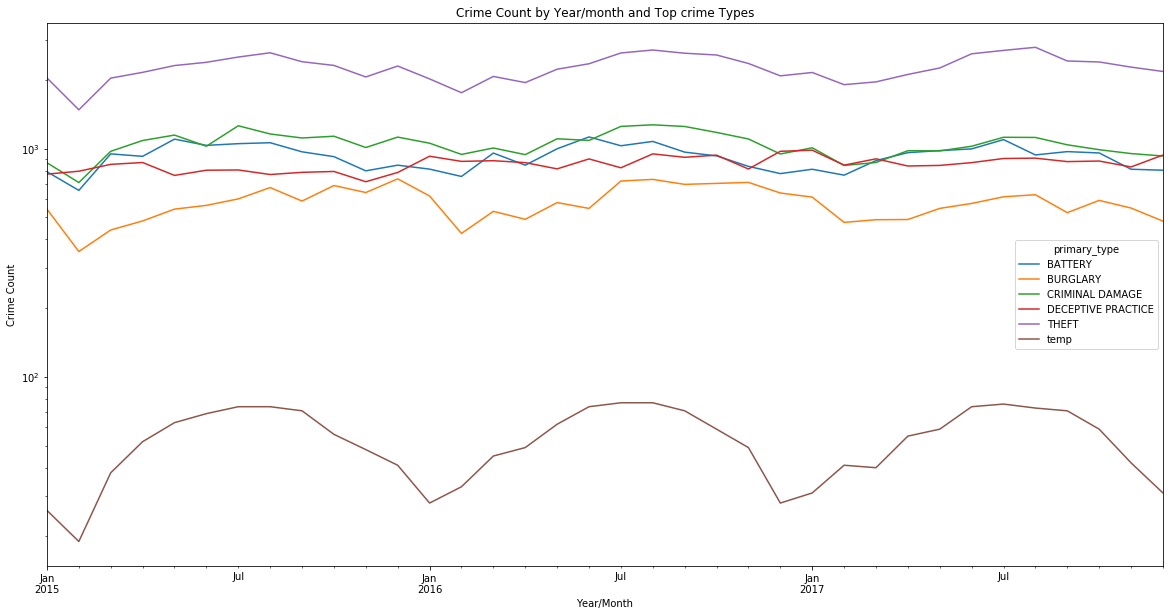

In [247]:
plot_trend=filtered_data_year_month_type1['id']
plot_trend.head(25)
ax1=plot_trend.unstack().plot()
temp_month.plot(use_index=True, ax=ax1,logy=True)
#temp_month.plot (ax=ax1)
plt.title("Crime Count by Year/month and Top crime Types")
plt.xlabel("Year/Month")
plt.ylabel("Crime Count")
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [248]:
Crime_time_type_temp= merge_table[merge_table["primary_type"]=='THEFT']
Crime_time_type_temp["temp"].agg(max)
Crime_time_type_temp["temp"].agg(min)
#Crime_time_type_temp.head()

-7.02